***Laboratorio 8***

Jose Miguel Gonzalez, 20335
Diego Perdomo, 20204


*Preprocesamiento de datos*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.mixture import GaussianMixture
import datetime
from datetime import timedelta, date
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize

# Load the data
data = pd.read_csv('./bank_transactions.csv')
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


<AxesSubplot: >

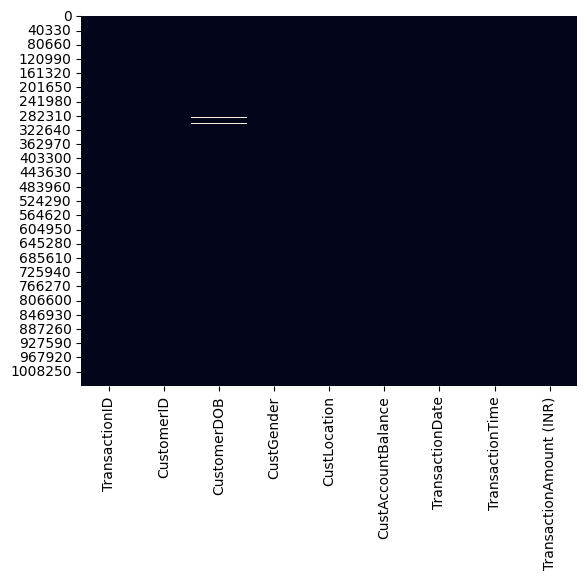

In [2]:
# datos faltantes
sns.heatmap(data.isnull(), cbar=False)


In [3]:
data.columns[data.isnull().any()]

pd.Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance'], dtype='object')

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance'], dtype='object')

In [4]:
# Check for missing values in dataset
for col in data.columns:
    # If column contains missing values
    if data[col].isnull().any():
        # If column is numerical
        if data[col].dtype == 'float64' or data[col].dtype == 'int64':
            # Fill missing values with mean
            data[col].fillna(data[col].mean(), inplace=True)
        # If column is categorical
        else:
            # Fill missing values with mode
            data[col].fillna(data[col].mode()[0], inplace=True)

# Print column names with remaining missing values
missing_cols = data.columns[data.isnull().any()]
print(missing_cols)

data.columns[data.isnull().any()]
pd.Index([], dtype='object')


Index([], dtype='object')


Index([], dtype='object')

In [5]:
# Limpieza y conversión de datos
data.head()

data = data.drop(['TransactionDate', 'TransactionID'], axis=1)

data.head()

data['YOB'] = data['CustomerDOB'].apply(lambda x: int(x.split('/')[2]))
data['YOB'] = data['YOB'].apply(lambda x: 1900 + x if x > 20 else 2000 + x)
data['YOB'] = data['YOB'].astype(int)
data['Age'] = 2023 - data['YOB']

data = data.drop(['YOB', 'CustomerDOB', 'CustLocation'], axis=1)

data.head()

#print(data['YOB'].head())


,CustomerID,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age
0,C5841053,F,17819.05,143207,25.0,29
1,C2142763,M,2270.69,141858,27999.0,66
2,C4417068,F,17874.44,142712,459.0,27
3,C5342380,F,866503.21,142714,2060.0,50
4,C9031234,F,6714.43,181156,1762.5,35


In [6]:
# Convert categorical variables to numerical

data['CustGender'] = data['CustGender'].map({'M': 0, 'F': 1})

# group by customer id

data = data.groupby('CustomerID').mean()

data.head()

,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age
CustomerID,,,,,
C1010011,0.5,76340.635,67521.0,2553.0,35.5
C1010012,0.0,24204.490,204409.0,1499.0,29.0
C1010014,0.5,100112.950,187378.0,727.5,35.0
C1010018,1.0,496.180,170254.0,30.0,33.0
C1010024,0.0,87058.650,141103.0,5000.0,58.0


In [7]:
# matriz de datos sin el id del cliente

gender = data['CustGender'].values
age = data['Age'].values
balance = data['CustAccountBalance'].values
transAmount = data['TransactionAmount (INR)'].values
transTime = data['TransactionTime'].values

data = pd.DataFrame({ 'CustGender':gender, 'CustAccountBalance':balance, 'TransactionAmount (INR)':transAmount, 'TransactionTime':transTime, 'Age':age})

# datos binarios

data.head()

data = data[(data['CustGender'] == 0) | (data['CustGender'] == 1)]

data.head()


,CustGender,CustAccountBalance,TransactionAmount (INR),TransactionTime,Age
1,0.0,24204.490,1499.0,204409.0,29.0
3,1.0,496.180,30.0,170254.0,33.0
4,0.0,87058.650,5000.0,141103.0,58.0
5,1.0,296828.370,557.0,95212.0,35.0
6,0.0,5200.155,932.0,162771.5,37.0


In [8]:
#data.describe()

data2 = data.copy()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data2)
normalized_data = normalize(data_scaled)

feat = pd.DataFrame(normalized_data, columns=data2.columns)
feat['CustGender'] = data['CustGender'].values
feat.head()


,CustGender,CustAccountBalance,TransactionAmount (INR),TransactionTime,Age
0,0.0,-0.097757,-0.009848,0.829874,0.204484
1,1.0,-0.079250,-0.131832,0.148764,0.137271
2,0.0,-0.038461,0.578709,-0.355441,0.342458
3,1.0,0.103667,-0.071741,-0.576074,0.115822
4,0.0,-0.202493,-0.145936,0.171651,0.381075


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
p = pca.fit_transform(feat)
p = pd.DataFrame(p)
p.columns = ['p1', 'p2']

variables = []
for e in pca.components_:
    max_i = np.argmax(np.abs(e))
    variables.append(feat.columns[max_i])

print(variables)

['TransactionTime', 'CustGender']
